In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
DATASET = 'videos_worth_spreading'
INPUT_PATH = 'input'
OUTPUT_PATH = 'output'
OUTPUT_FILENAME = OUTPUT_PATH + '/' + DATASET + '.out'
INPUT_FILENAME = INPUT_PATH + '/' + DATASET + '.in'

In [75]:
class Input:
    def __init__(self):
        self.cursor = 0
        self.rows = self.read_csv()
        
    def parse(self):
        header = self.read_header()
        self.read_videos()
        endpoints = self.read_endpoints(header['endpoints'])
        requests = self.read_requests(header['requests'])
        return {
            'header': header,
            'endpoints': endpoints,
            'requests': requests
        }
        
    def read_csv(self):
        f = open(INPUT_FILENAME, 'r')
        reader = csv.reader(f, delimiter=' ')
        rows = []
        for row in reader:
            rows.append([int(r) for r in row])
        f.close()
        return rows
    
    def read_row(self):
        row = self.rows[self.cursor]
        self.cursor += 1
        return row
    
    def skip_rows(self, count):
        self.cursor += count
    
    def read_header(self):
        videos, endpoints, requests, caches, capacity = self.read_row()
        return {
            'videos': videos,
            'endpoints': endpoints,
            'requests': requests,
            'caches': caches,
            'capacity': capacity
           }
    
    def read_videos(self):
        self.skip_rows(1)
    
    def read_endpoints(self, endpoint_count):
        result = []
        for endpoint_id in range(endpoint_count):
            datacenter_latency, caches_count = self.read_row()
            result.append({
                'endpoint_id': endpoint_id,
                'datacenter_latency': datacenter_latency,
            })
            self.skip_rows(caches_count)
        return result
    
    def read_requests(self, requests_count):
        result = []
        for r in range(requests_count):
            video_id, endpoint_id, num_requests = self.read_row()
            result.append({
                'video_id': video_id,
                'endpoint_id': endpoint_id,
                'num_requests': num_requests
            })
        return result
    

In [76]:
inputs = Input().parse()
inputs

{'header': {'videos': 10000,
  'endpoints': 100,
  'requests': 100000,
  'caches': 100,
  'capacity': 10000},
 'endpoints': [{'endpoint_id': 0, 'datacenter_latency': 845},
  {'endpoint_id': 1, 'datacenter_latency': 14},
  {'endpoint_id': 2, 'datacenter_latency': 187},
  {'endpoint_id': 3, 'datacenter_latency': 1156},
  {'endpoint_id': 4, 'datacenter_latency': 1219},
  {'endpoint_id': 5, 'datacenter_latency': 537},
  {'endpoint_id': 6, 'datacenter_latency': 183},
  {'endpoint_id': 7, 'datacenter_latency': 1908},
  {'endpoint_id': 8, 'datacenter_latency': 1080},
  {'endpoint_id': 9, 'datacenter_latency': 1664},
  {'endpoint_id': 10, 'datacenter_latency': 531},
  {'endpoint_id': 11, 'datacenter_latency': 1301},
  {'endpoint_id': 12, 'datacenter_latency': 677},
  {'endpoint_id': 13, 'datacenter_latency': 1263},
  {'endpoint_id': 14, 'datacenter_latency': 1616},
  {'endpoint_id': 15, 'datacenter_latency': 898},
  {'endpoint_id': 16, 'datacenter_latency': 1673},
  {'endpoint_id': 17, 'datace

In [77]:
df = pd.DataFrame(inputs['endpoints'])
df.describe()

,datacenter_latency,endpoint_id
count,100.00000,100.000000
mean,940.88000,49.500000
std,533.98264,29.011492
min,14.00000,0.000000
25%,531.75000,24.750000
50%,891.50000,49.500000
75%,1327.75000,74.250000
max,1995.00000,99.000000


,endpoint_id
video_id,
0,15221
1,7204
2,4587
3,3258
4,2610
5,2083
6,1862
7,1536
8,1309


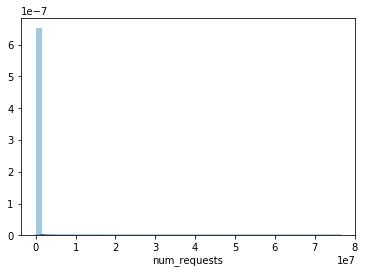

In [104]:
df = pd.DataFrame(inputs['requests'])
requests = df.groupby('video_id').sum().sort_values('num_requests', ascending=False)['num_requests']
sns.distplot(requests)
requests.describe()
requests_endpoint = df.groupby('video_id').aggregate({'endpoint_id': 'count'})
requests_endpoint.head(200)


In [79]:
class Ouput:
    def dump(self, parameters)
        content = self.build(parameters)
        self.write(content)
    
    def build(self, parameters):
        pass

    def write(self, output):
        f = open(OUTPUT_FILENAME, 'w')
        f.write(output)
        f.close()

SyntaxError: invalid syntax (<ipython-input-79-bb3695e6d710>, line 2)